In [1]:
import chemprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = f'../../data/log_standardize_prefix/test.csv'
model_path = f'./model'

In [3]:
data = pd.read_csv(data_path)

In [4]:
arguments = [
    '--test_path', data_path,
    '--preds_path', './predictions/validation.csv',
    '--checkpoint_dir', model_path, 
    '--features_generator', 'rdkit_2d_normalized', 
    '--no_features_scaling'
]
args = chemprop.args.PredictArgs().parse_args(arguments)

preds = np.array(chemprop.train.make_predictions(args=args))

Loading training args


/scratch/midway3/jshe/.conda/envs/proppred/lib/python3.8/site-packages/chemprop/utils.py:472: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_locatio

Setting molecule featurization parameters to default.
Loading data


356it [00:00, 199648.65it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████| 356/356 [00:12<00:00, 29.40it/s]


Validating SMILES
Test size = 356


  0%|                                                                                                        | 0/1 [00:00<?, ?it/s]/scratch/midway3/jshe/.conda/envs/proppred/lib/python3.8/site-packages/chemprop/utils.py:111: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the l

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "readout.7.weight".
Loading pretrained parameter "readout.7.bias".



100%|████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.77s/it]

Saving predictions to ./predictions/validation.csv
Elapsed time = 0:00:18


In [7]:
sum_r2 / 7

0.07061369854901987

In [6]:
sum_r2 = 0

for i in range(7):
    y_true = data.iloc[:, i+1]
    y_pred = preds[:, i]

    res = ((y_true - y_pred) ** 2).sum()
    tot = ((y_true - y_true.mean()) ** 2).sum()
    r2 = 1 - (res/tot)

    sum_r2 += r2

    print(data.columns[i+1])
    print(f'\tR^2: {r2}')
    print(f'\tMSE: {((y_true - y_pred) ** 2).mean()}')

property_LPS_Abs
	R^2: 0.039502515989846665
	MSE: 0.8465681324773533
property_LPS_Lum
	R^2: 0.09916362698545733
	MSE: 1.0014858781041316
property_MPLA_Abs
	R^2: 0.03681874805837715
	MSE: 0.6871714695368234
property_MPLA_Lum
	R^2: 0.06472914986481193
	MSE: 0.6396093789733728
property_CpG_Abs
	R^2: 0.12088987963918063
	MSE: 0.639228977433058
property_cGAMP_Abs
	R^2: 0.034088659022021406
	MSE: 0.6932624558344663
property_cGAMP_Lum
	R^2: 0.09910331028344399
	MSE: 1.0243289085205447


(array([  2.,   0.,   3.,   5.,   3.,   3.,  12.,  10.,  74., 244.]),
 array([-1.54157115, -1.36484636, -1.18812157, -1.01139678, -0.834672  ,
        -0.65794721, -0.48122242, -0.30449763, -0.12777284,  0.04895195,
         0.22567673]),
 <BarContainer object of 10 artists>)

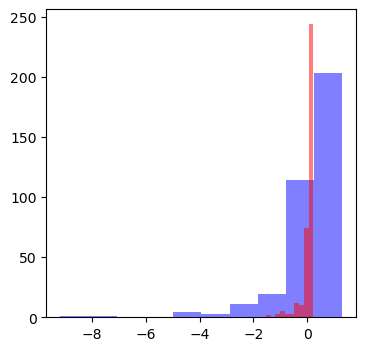

In [6]:
fig, ax0 = plt.subplots(figsize=(4, 4))

ax0.hist(data.iloc[:, -1], alpha=0.5, color='b')
ax0.hist(preds[:, -1], alpha=0.5, color='r')

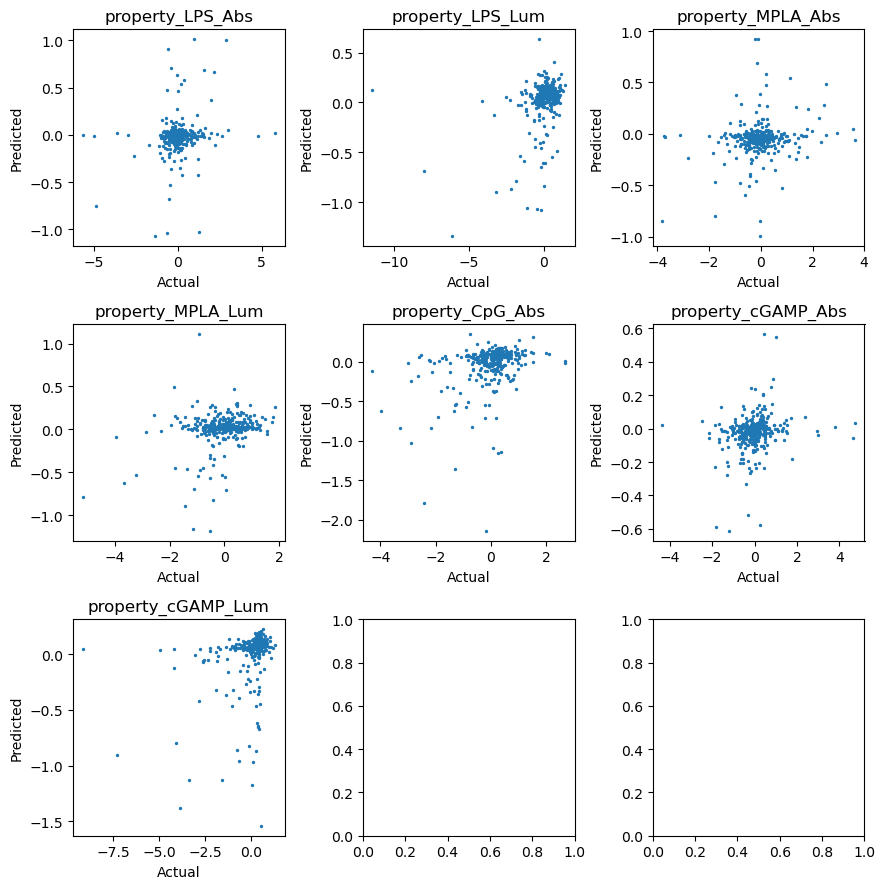

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
axs = axs.flatten()

for i, property_label in enumerate(data.columns[1:]):

    ax = axs[i]

    ax.scatter(data.iloc[:, i+1], preds[:, i], s=2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(property_label)

plt.tight_layout()

In [8]:
fig.savefig('predictions.pdf')